<a href="https://colab.research.google.com/github/kadefue/3D-Reconstruction-with-Deep-Learning-Methods/blob/master/Earth2studio_testing_with_ERA5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Earth2Studio GFS Data Download, Inference, and Visualization Example

This script demonstrates how to use the Earth2Studio library to:

1. **Install necessary dependencies:** Installs `earth2studio`, `cartopy`, `geopandas`, and `rioxarray`.
2. **Load and manage models:** Downloads and loads the FCN model package, optionally caching it on Google Drive.
3. **Download GFS Data:** Utilizes the GFS data source to fetch meteorological data for a specified time range.
4. **Run Deterministic Inference:** Executes a deterministic forecast using the loaded FCN model and the downloaded GFS data.
5. **Store and Verify Results:** Saves the inference output to a Zarr backend, optionally on Google Drive, and verifies the saved data structure.
6. **Visualize Forecast Data:**
    - Generates a global plot of a chosen variable (e.g., 2m temperature) at a specific lead time using `cartopy`.
    - Creates a zoomed-in plot for a specific region (Tanzania) using `cartopy` and `geopandas` for boundary information.
    - Demonstrates different plotting styles, including pcolormesh and contourf for smoother visualization.
    - Shows how to clip data to geographical boundaries using `rioxarray` and a shapefile.
    - Classifies temperature data into discrete bins and visualizes the classes within selected districts using a shapefile and `matplotlib.colors.BoundaryNorm`.

## Requirements

- Google Colab environment (or a similar environment with access to necessary libraries and potentially Google Drive)
- A Google account with Google Drive access (if using the Google Drive caching and output features)
- A shapefile for geographical boundaries (if running the clipping and localized plotting sections). The example uses a shapefile located at `/content/drive/MyDrive/Shapefiles/Districts and TC as 2020.shp` on Google Drive.

## How to Use

1. Open the notebook in Google Colab.
2. Run the code cells sequentially.
3. If using Google Drive features, authorize access when prompted.
4. Update the `shapefile_path` variable in the relevant cells to point to your desired shapefile location on Google Drive.
5. Modify the `target_districts` list in the classified plotting cell to select specific districts for visualization.
6. Explore the generated plots saved in the `outputs` directory.

This script provides a comprehensive example of a typical workflow with Earth2Studio for weather data processing, model inference, and geographical visualization.

In [10]:
!pip install earth2studio

ERROR: Could not find a version that satisfies the requirement ngc-cli (from versions: none)
ERROR: No matching distribution found for ngc-cli


In [21]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 103.0 MB/s eta 0:00:00


In [3]:
!pip install earth2studio

In [18]:
from dotenv import load_dotenv

load_dotenv()  # TODO: make common example prep function

from earth2studio.data import GFS
from earth2studio.io import ZarrBackend
from earth2studio.models.px import FCN

# Load the default model package which downloads the check point from NGC
package = FCN.load_default_package()
model = FCN.load_model(package)

# Create the data source
data = GFS()

# Create the IO handler, store in memory
io = ZarrBackend()

In [19]:
import earth2studio.run as run

nsteps = 20
io = run.deterministic(["2024-01-01"], nsteps, model, data, io)

print(io.root.tree())

2025-08-04 14:59:33.169 | INFO     | earth2studio.run:deterministic:75 - Running simple workflow!
2025-08-04 14:59:33.169 | INFO     | earth2studio.run:deterministic:82 - Inference device: cpu


Fetching GFS data:   0%|          | 0/26 [00:00<?, ?it/s]

2025-08-04 14:59:33.993 | DEBUG    | earth2studio.data.gfs:fetch_array:380 - Fetching GFS grib file: noaa-gfs-bdp-pds/gfs.20240101/00/atmos/gfs.t00z.pgrb2.0p25.f000 329739828-930772
2025-08-04 14:59:33.999 | DEBUG    | earth2studio.data.gfs:fetch_array:380 - Fetching GFS grib file: noaa-gfs-bdp-pds/gfs.20240101/00/atmos/gfs.t00z.pgrb2.0p25.f000 414179964-1179422
2025-08-04 14:59:34.004 | DEBUG    | earth2studio.data.gfs:fetch_array:380 - Fetching GFS grib file: noaa-gfs-bdp-pds/gfs.20240101/00/atmos/gfs.t00z.pgrb2.0p25.f000 330670600-938837
2025-08-04 14:59:34.010 | DEBUG    | earth2studio.data.gfs:fetch_array:380 - Fetching GFS grib file: noaa-gfs-bdp-pds/gfs.20240101/00/atmos/gfs.t00z.pgrb2.0p25.f000 451628742-968328
2025-08-04 14:59:34.015 | DEBUG    | earth2studio.data.gfs:fetch_array:380 - Fetching GFS grib file: noaa-gfs-bdp-pds/gfs.20240101/00/atmos/gfs.t00z.pgrb2.0p25.f000 323956279-837771
2025-08-04 14:59:34.020 | DEBUG    | earth2studio.data.gfs:fetch_array:380 - Fetching GFS

Fetching GFS data: 100%|██████████| 26/26 [00:04<00:00,  5.90it/s]


2025-08-04 14:59:38.812 | SUCCESS  | earth2studio.run:deterministic:106 - Fetched data from GFS
2025-08-04 14:59:38.823 | WARNING  | earth2studio.io.zarr:add_array:192 - Datetime64 not supported in zarr 3.0, converting to int64 nanoseconds since epoch
2025-08-04 14:59:38.838 | WARNING  | earth2studio.io.zarr:add_array:198 - Timedelta64 not supported in zarr 3.0, converting to int64 nanoseconds since epoch
2025-08-04 14:59:38.895 | INFO     | earth2studio.run:deterministic:136 - Inference starting!



Running inference: 100%|██████████| 21/21 [20:48<00:00, 59.47s/it]

2025-08-04 15:20:27.802 | SUCCESS  | earth2studio.run:deterministic:146 - Inference complete


/
├── lat (720,) float64
├── lead_time (21,) int64
├── lon (1440,) float64
├── msl (1, 21, 720, 1440) float32
├── r500 (1, 21, 720, 1440) float32
├── r850 (1, 21, 720, 1440) float32
├── sp (1, 21, 720, 1440) float32
├── t250 (1, 21, 720, 1440) float32
├── t2m (1, 21, 720, 1440) float32
├── t500 (1, 21, 720, 1440) float32
├── t850 (1, 21, 720, 1440) float32
├── tcwv (1, 21, 720, 1440) float32
├── time (1,) int64
├── u1000 (1, 21, 720, 1440) float32
├── u100m (1, 21, 720, 1440) float32
├── u10m (1, 21, 720, 1440) float32
├── u250 (1, 21, 720, 1440) float32
├── u500 (1, 21, 720, 1440) float32
├── u850 (1, 21, 720, 1440) float32
├── v1000 (1, 21, 720, 1440) float32
├── v100m (1, 21, 720, 1440) float32
├── v10m (1, 21, 720, 1440) float32
├── v250 (1, 21, 720, 1440) float32
├── v500 (1, 21, 720, 1440) float32
├── v850 (1, 21, 720, 1440) float32
├── z1000 (1, 21, 720, 1440) float32
├── z250 (1, 21, 720, 1440) float32
├── z50 (1, 21, 720, 1440) float32
├── z500 (1, 21, 720, 1440) float32
└── z850 (1, 21, 720, 1440) float32

In [ ]:
import os
from dotenv import load_dotenv
from google.colab import drive

# --- Step 1: Mount Google Drive ---
# This gives our Colab notebook access to your Drive files.
print("--- Step 1: Mounting Google Drive ---")
drive.mount('/content/drive')


# --- Step 2: Define Paths and Prepare Folders ---
# We'll organize everything in a main 'earth2studio' folder on your Drive.
print("\n--- Step 2: Setting up paths on Google Drive ---")
drive_base_path = "/content/drive/MyDrive/earth2studio_data"
fcn_package_path = os.path.join(drive_base_path, "models", "fcn")
prediction_output_path = os.path.join(drive_base_path, "outputs", "fcn_gfs_20-step")

# Create the directories if they don't exist
os.makedirs(fcn_package_path, exist_ok=True)
os.makedirs(prediction_output_path, exist_ok=True)
print(f"Model will be stored in: {fcn_package_path}")
print(f"Predictions will be saved to: {prediction_output_path}")


# --- Step 3: Load Model, Caching to Google Drive ---
print("\n--- Step 3: Loading FCN model ---")
load_dotenv()

from earth2studio.utils.packaging import Package
from earth2studio.models.px import FCN

# Create a Package object that points to our desired folder on Drive
fcn_package = Package(fcn_package_path)

# Check if the model package is already downloaded in our Drive folder.
if not fcn_package.is_available():
    print("Model package not found on Google Drive. Downloading...")
    # If not, download the default package files INTO our specified folder.
    FCN.download_default_package(fcn_package_path)
    print("Download complete.")
else:
    print("Model package found on Google Drive, loading from cache.")

# Load the model from the specified package on Google Drive
model = FCN.load_model(fcn_package)
print("FCN model loaded successfully.")


# --- Step 4: Prepare Data Source and I/O Backend ---
print("\n--- Step 4: Initializing data source and I/O backend ---")
from earth2studio.data import GFS
from earth2studio.io import ZarrBackend

# Data source remains the same
data_source = GFS()

# Create the IO handler, pointing it to our output path on Drive.
# This will create a Zarr store at that location.
io_backend = ZarrBackend(path=prediction_output_path)


# --- Step 5: Run the Forecast ---
print("\n--- Step 5: Running 20-step deterministic forecast ---")
import earth2studio.run as run

# Define forecast parameters
nsteps = 20
start_time = ["2024-01-01"] # Using a recent date for GFS data availability

# Run the forecast. Data will be written to the Zarr store on Drive as it's generated.
io_backend = run.deterministic(start_time, nsteps, model, data_source, io_backend)
print("Forecast run complete.")


# --- Step 6: Verify the Output ---
print("\n--- Step 6: Verifying output on Google Drive ---")

# You can list the files in the directory to confirm they were created
print("\nContents of the output directory:")
!ls -l {prediction_output_path}

# To prove the data is saved, we can load it back from the Zarr store
# and inspect it using xarray.
import xarray as xr
print("\nLoading result back from Google Drive for verification...")
saved_forecast = xr.open_zarr(prediction_output_path)

print("\nPrediction data structure:")
print(saved_forecast)

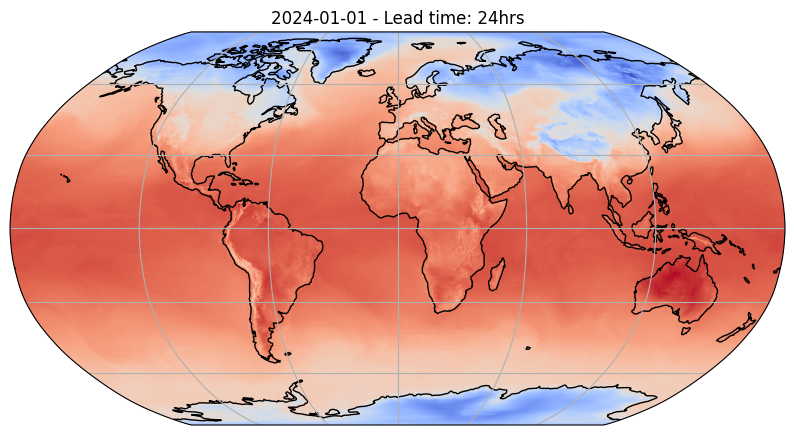

In [22]:
import os

os.makedirs("outputs", exist_ok=True)
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

forecast = "2024-01-01"
variable = "t2m"
step = 4  # lead time = 24 hrs

plt.close("all")
# Create a Robinson projection
projection = ccrs.Robinson()

# Create a figure and axes with the specified projection
fig, ax = plt.subplots(subplot_kw={"projection": projection}, figsize=(10, 6))

# Plot the field using pcolormesh
im = ax.pcolormesh(
    io["lon"][:],
    io["lat"][:],
    io[variable][0, step],
    transform=ccrs.PlateCarree(),
    cmap="coolwarm",
)

# Set title
ax.set_title(f"{forecast} - Lead time: {6*step}hrs")

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines()
plt.savefig("outputs/01_t2m_prediction.jpg")

Creating sample data for demonstration...
Generating plot for 2025-08-04 focused on Tanzania...
Plot saved successfully to outputs/tanzania_t2m_prediction.jpg


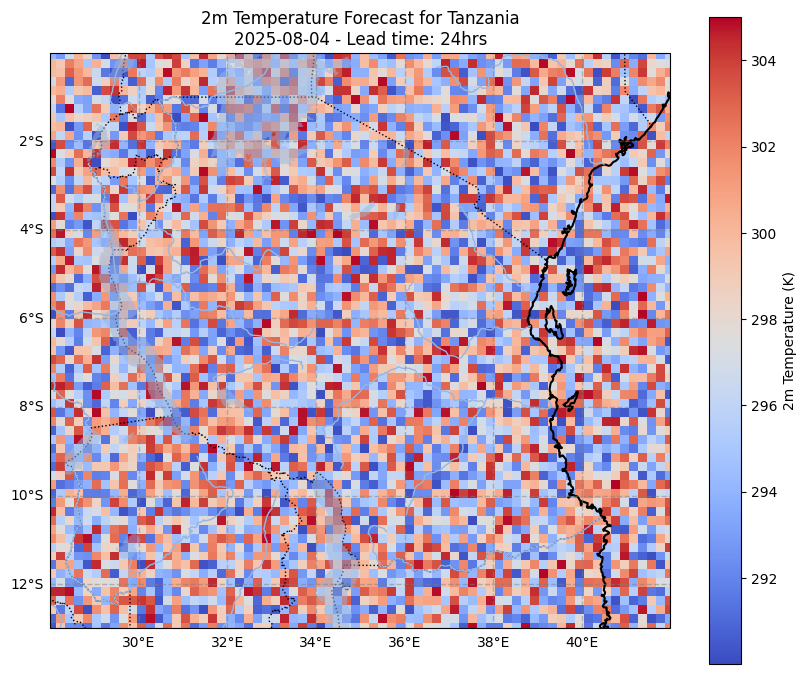

In [23]:
import os
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# --- 1. Create Dummy Data (Replace with your data) ---
# Your original code uses an object `io`. Since I don't have it,
# I'm creating a sample data dictionary here.
# Make sure your `io` object has the same structure.
print("Creating sample data for demonstration...")
data = {
    # Longitude covering East Africa
    "lon": np.linspace(25, 45, 100),
    # Latitude covering East Africa
    "lat": np.linspace(-15, 5, 100),
}
# Create a 2D array of random temperature data
# The shape must be (number of latitudes, number of longitudes)
temp_data = 290 + 15 * np.random.rand(len(data["lat"]), len(data["lon"]))
data["t2m"] = np.expand_dims(temp_data, axis=0) # Add a time dimension to match your shape

# For clarity, let's use the name 'data' instead of 'io'
# In your code, you can just replace `data` with `io` everywhere below.


# --- 2. Setup Plotting Environment ---
# Define plot variables
os.makedirs("outputs", exist_ok=True)
forecast_date = "2025-08-04" # Using today's date
variable = "t2m"
lead_time_hrs = 24

# Define the geographical area for Tanzania (with some padding)
# Format: [min_longitude, max_longitude, min_latitude, max_latitude]
tanzania_bounds = [28, 42, -13, 0]


# --- 3. Create the Map Plot ---
print(f"Generating plot for {forecast_date} focused on Tanzania...")
plt.close("all")

# Use a projection suitable for a regional map. PlateCarree is simple and effective.
projection = ccrs.PlateCarree()
fig, ax = plt.subplots(subplot_kw={"projection": projection}, figsize=(10, 12))

# Use pcolormesh to plot the temperature data.
# The data's original projection is PlateCarree (lon/lat).
im = ax.pcolormesh(
    data["lon"],
    data["lat"],
    data[variable][0, :], # Slicing to get the 2D data
    transform=ccrs.PlateCarree(),
    cmap="coolwarm",
    shading='auto'
)

# --- 4. Add Geographic Features and Set Extent ---
# This is the key step to zoom in on Tanzania
ax.set_extent(tanzania_bounds, crs=ccrs.PlateCarree())

# Add features that are useful at a country level
ax.add_feature(cfeature.COASTLINE, linewidth=1.5)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# --- 5. Finalize the Plot ---
# Add gridlines and labels
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Add a color bar to show what the colors represent
cbar = plt.colorbar(im, ax=ax, orientation="vertical", pad=0.05, shrink=0.7)
cbar.set_label("2m Temperature (K)") # Update unit if necessary (e.g., °C)

# Set title
ax.set_title(f"2m Temperature Forecast for Tanzania\n{forecast_date} - Lead time: {lead_time_hrs}hrs")

# Save the figure
output_path = "outputs/tanzania_t2m_prediction.jpg"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"Plot saved successfully to {output_path}")
plt.show()

Creating sample data for demonstration...
Generating smooth plot using contourf...
Plot saved successfully to outputs/tanzania_t2m_smooth_contour.jpg


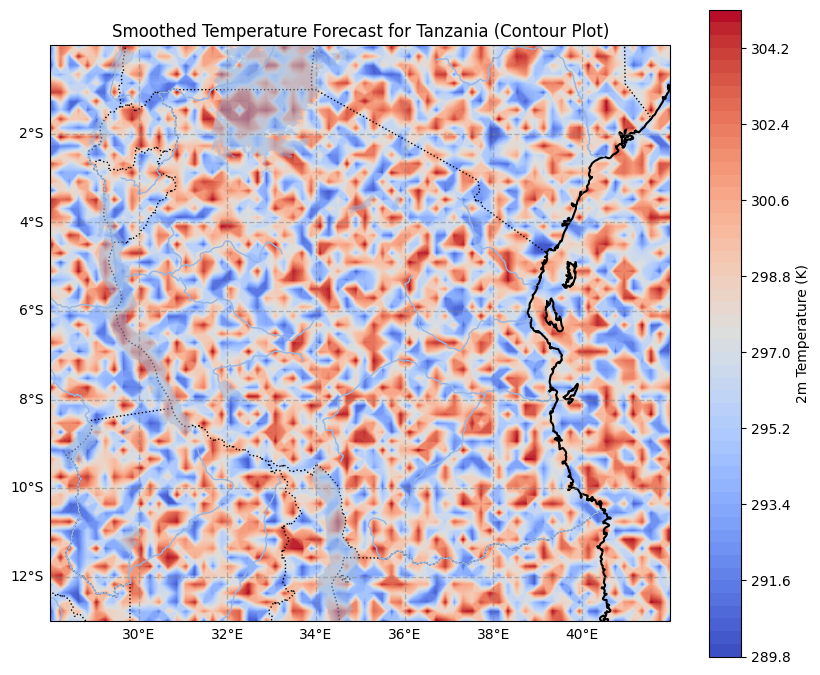

In [24]:
import os
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# --- 1. Create Dummy Data (Same as before) ---
print("Creating sample data for demonstration...")
data = {
    "lon": np.linspace(25, 45, 100),
    "lat": np.linspace(-15, 5, 100),
}
temp_data = 290 + 15 * np.random.rand(len(data["lat"]), len(data["lon"]))
data["t2m"] = np.expand_dims(temp_data, axis=0)


# --- 2. Setup Plotting Environment ---
os.makedirs("outputs", exist_ok=True)
tanzania_bounds = [28, 42, -13, 0]


# --- 3. Create the Smooth Contour Plot ---
print("Generating smooth plot using contourf...")
plt.close("all")
projection = ccrs.PlateCarree()
fig, ax = plt.subplots(subplot_kw={"projection": projection}, figsize=(10, 12))

# NEW: Use contourf instead of pcolormesh
# We use `levels=50` to create many fine, smooth bands of color.
im = ax.contourf(
    data["lon"],
    data["lat"],
    data["t2m"][0, :],
    levels=50, # More levels = smoother look
    transform=ccrs.PlateCarree(),
    cmap="coolwarm"
)

# --- Add features and finalize plot (same as before) ---
ax.set_extent(tanzania_bounds, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, linewidth=1.5)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False; gl.right_labels = False
cbar = plt.colorbar(im, ax=ax, orientation="vertical", pad=0.05, shrink=0.7)
cbar.set_label("2m Temperature (K)")
ax.set_title("Smoothed Temperature Forecast for Tanzania (Contour Plot)")

output_path = "outputs/tanzania_t2m_smooth_contour.jpg"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"Plot saved successfully to {output_path}")
plt.show()

--- Step 1: Installing geopandas and rioxarray ---

--- Step 2: Mounting Google Drive ---
Mounted at /content/drive

--- Step 3: Loading Tanzania boundary shapefile ---
Shapefile loaded and projected successfully.

--- Step 4: Preparing and clipping data ---
Spatial dimensions ('lon', 'lat') have been set.
Data clipped to Tanzania boundary.

--- Step 5: Generating final map ---
Plot saved successfully to outputs/tanzania_t2m_clipped_boundary.jpg


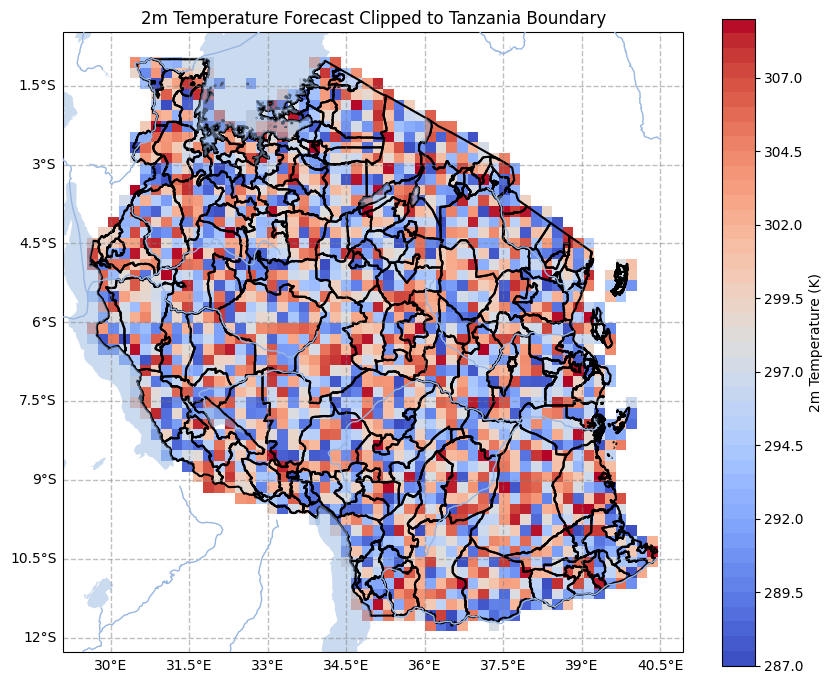

In [30]:
import os
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# --- Step 1: Install necessary libraries ---
print("--- Step 1: Installing geopandas and rioxarray ---")
!pip install -q geopandas rioxarray

import geopandas
import rioxarray


# --- Step 2: Mount Google Drive ---
print("\n--- Step 2: Mounting Google Drive ---")
from google.colab import drive
drive.mount('/content/drive', force_remount=True) # force_remount can help with stale connections


# --- Step 3: Load Tanzania Boundary Shapefile ---
print("\n--- Step 3: Loading Tanzania boundary shapefile ---")
shapefile_path = "/content/drive/MyDrive/Shapefiles/Districts and TC as 2020.shp"

try:
    tanzania_gdf = geopandas.read_file(shapefile_path)
    tanzania_gdf = tanzania_gdf.to_crs("EPSG:4326")
    print("Shapefile loaded and projected successfully.")
except Exception as e:
    print(f"ERROR: Could not load the shapefile. Please check the path: {shapefile_path}")
    print(f"Error details: {e}")
    raise e


# --- Step 4: Prepare Data and Clip ---
print("\n--- Step 4: Preparing and clipping data ---")
# Using dummy data. Replace with your actual data source.
data = {
    "lon": np.linspace(25, 45, 100),
    "lat": np.linspace(-15, 5, 100),
}
temp_data = 290 + 15 * np.random.rand(len(data["lat"]), len(data["lon"]))

temp_da = xr.DataArray(
    data=temp_data,
    dims=["lat", "lon"],
    coords=dict(
        lon=(["lon"], data["lon"]),
        lat=(["lat"], data["lat"]),
    )
)

# Add Coordinate Reference System (CRS) information
temp_da.rio.write_crs("EPSG:4326", inplace=True)

# *** THIS IS THE NEW, CORRECTED LINE ***
# Explicitly tell rioxarray which dimensions are X and Y.
temp_da.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
print("Spatial dimensions ('lon', 'lat') have been set.")

# The core clipping operation should now work.
temp_clipped = temp_da.rio.clip(tanzania_gdf.geometry, all_touched=True)
print("Data clipped to Tanzania boundary.")


# --- Step 5: Create the Final Plot ---
print("\n--- Step 5: Generating final map ---")
plt.close("all")
projection = ccrs.PlateCarree()
fig, ax = plt.subplots(subplot_kw={"projection": projection}, figsize=(10, 12))

temp_clipped.plot.pcolormesh(
    ax=ax,
    x="lon",
    y="lat",
    transform=ccrs.PlateCarree(),
    cmap="coolwarm",
    add_colorbar=False
)

tanzania_gdf.boundary.plot(ax=ax, color='black', linewidth=1.5)
ax.add_feature(cfeature.LAKES, alpha=0.5, zorder=2)
ax.add_feature(cfeature.RIVERS, zorder=3)

gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False; gl.right_labels = False
cbar = plt.colorbar(im, ax=ax, orientation="vertical", pad=0.05, shrink=0.7)
cbar.set_label("2m Temperature (K)")
ax.set_title("2m Temperature Forecast Clipped to Tanzania Boundary")

minx, miny, maxx, maxy = tanzania_gdf.total_bounds
ax.set_extent([minx - 0.5, maxx + 0.5, miny - 0.5, maxy + 0.5], crs=ccrs.PlateCarree())

output_path = "outputs/tanzania_t2m_clipped_boundary.jpg"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"Plot saved successfully to {output_path}")
plt.show()

--- Step 1: Installing geopandas and rioxarray ---

--- Step 2: Mounting Google Drive ---
Mounted at /content/drive

--- Step 3: Loading shapefile and inspecting districts ---
Shapefile with all districts loaded successfully.

Shapefile columns are: ['Region_Nam', 'Region_Cod', 'District_C', 'NewDist20', 'geometry']

Found 195 unique districts in the column 'NewDist20':
['Arusha DC', 'Arusha MC', 'Babati DC', 'Babati MC', 'Bagamoyo DC', 'Bahi DC', 'Bariadi DC', 'Bariadi TC', 'Biharamulo DC', 'Buchosa DC', 'Buhigwe DC', 'Bukoba DC', 'Bukoba MC', 'Bukombe DC', 'Bumbuli DC', 'Bunda DC', 'Bunda TC', 'Busega DC', 'Busokelo DC', 'Butiama DC', 'Chake Chake', 'Chalinze DC', 'Chamwino DC', 'Chato DC', 'Chemba DC', 'Chunya DC', 'Dodoma CC', 'Gairo DC', 'Geita DC', 'Geita TC', 'Hai DC', 'Hanang DC', 'Handeni DC', 'Handeni TC', 'Ifakara TC', 'Igunga DC', 'Ikungi DC', 'Ilala MC', 'Ileje DC', 'Ilemela MC', 'Iramba DC', 'Iringa DC', 'Iringa MC', 'Itigi DC', 'Itilima DC', 'Kahama TC', 'Kakonko DC', 'K

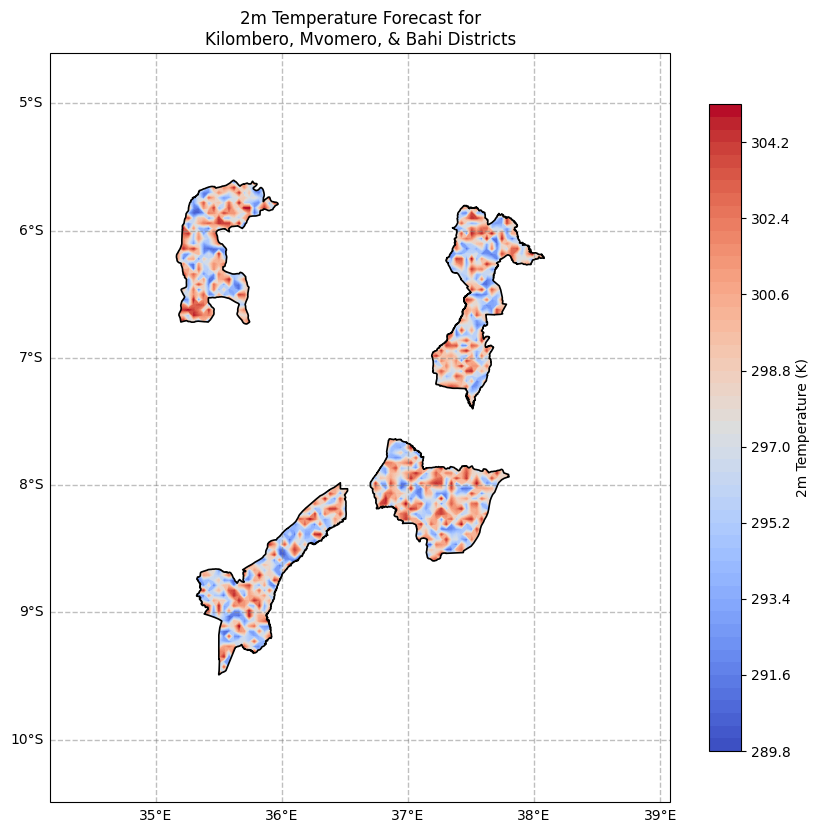

In [33]:
import os
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib.path import Path
from matplotlib.patches import PathPatch

# --- Step 1: Install necessary libraries ---
print("--- Step 1: Installing geopandas and rioxarray ---")
!pip install -q geopandas rioxarray

import geopandas
import rioxarray


# --- Step 2: Mount Google Drive ---
print("\n--- Step 2: Mounting Google Drive ---")
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


# --- Step 3: Load Shapefile, List all Districts, and Filter ---
print("\n--- Step 3: Loading shapefile and inspecting districts ---")
shapefile_path = "/content/drive/MyDrive/Shapefiles/Districts and TC as 2020.shp"

try:
    all_districts_gdf = geopandas.read_file(shapefile_path)
    all_districts_gdf = all_districts_gdf.to_crs("EPSG:4326")
    print("Shapefile with all districts loaded successfully.")

    # --- Diagnostic Step 1: Find the correct column name ---
    print("\nShapefile columns are:", all_districts_gdf.columns.tolist())

    # --- Set the column name that contains district names ---
    # *** IMPORTANT: Change 'District_N' to the correct column name from the list above! ***
    district_col_name = 'NewDist20'

    # --- NEW: List all available districts ---
    if district_col_name in all_districts_gdf.columns:
        all_district_names = sorted(all_districts_gdf[district_col_name].unique())
        print(f"\nFound {len(all_district_names)} unique districts in the column '{district_col_name}':")
        # Print the full list for you to see
        print(all_district_names)
    else:
        # If the column name is wrong, we stop here with a clear error.
        raise ValueError(f"CRITICAL ERROR: Column '{district_col_name}' not found in the shapefile. Please update the 'district_col_name' variable.")

    # --- Filtering Logic: Choose your districts here ---
    target_districts = ['Kilombero DC', 'Mvomero DC', 'Bahi DC']
    selected_districts_gdf = all_districts_gdf[all_districts_gdf[district_col_name].isin(target_districts)]

    if selected_districts_gdf.empty:
        raise ValueError(f"No districts found for {target_districts}. Please check the spelling or choose other districts from the list above.")

    print(f"\nSuccessfully selected {len(selected_districts_gdf)} districts for plotting.")

except Exception as e:
    print(f"ERROR: An error occurred during file loading or processing.")
    raise e


# --- Step 4: Prepare and Interpolate Data (No changes here) ---
print("\n--- Step 4: Preparing and interpolating data ---")
data = { "lon": np.linspace(25, 45, 500), "lat": np.linspace(-15, 5, 500),}
temp_data = 290 + 15 * np.random.rand(len(data["lat"]), len(data["lon"]))
interp_lon = data["lon"]; interp_lat = data["lat"]; temp_interp = temp_data
print("Data prepared.")


# --- Step 5: Create the Plot, Clipping to the Selected Districts ---
print("\n--- Step 5: Generating final map for selected districts ---")
# (The rest of the code is unchanged and will use the 'selected_districts_gdf')
plt.close("all")
projection = ccrs.PlateCarree()
fig, ax = plt.subplots(subplot_kw={"projection": projection}, figsize=(10, 12))

im = ax.contourf(interp_lon, interp_lat, temp_interp, levels=50, transform=ccrs.PlateCarree(), cmap="coolwarm")

selected_shape = selected_districts_gdf.geometry.unary_union
clip_path_list = []
# Handle both Polygon and MultiPolygon geometries safely
for geom in selected_shape.geoms:
    for poly_part in (geom if geom.geom_type == 'MultiPolygon' else [geom]):
        codes = []
        verts = list(poly_part.exterior.coords)
        codes += [Path.MOVETO] + [Path.LINETO] * (len(verts) - 1)
        for interior in poly_part.interiors:
            verts += list(interior.coords)
            codes += [Path.MOVETO] + [Path.LINETO] * (len(interior.coords) - 1)
        clip_path_list.append(Path(verts, codes))

clip_patch = PathPatch(Path.make_compound_path(*clip_path_list), transform=ax.transData)
im.set_clip_path(clip_patch)

selected_districts_gdf.boundary.plot(ax=ax, color='black', linewidth=1.2, zorder=5)

gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False; gl.right_labels = False
cbar = plt.colorbar(im, ax=ax, orientation="vertical", pad=0.05, shrink=0.7)
cbar.set_label("2m Temperature (K)")
ax.set_title("2m Temperature Forecast for\nKilombero, Mvomero, & Bahi Districts")

minx, miny, maxx, maxy = selected_districts_gdf.total_bounds
ax.set_extent([minx - 1.0, maxx + 1.0, miny - 1.0, maxy + 1.0], crs=ccrs.PlateCarree()) # Increased padding

output_path = "outputs/selected_districts_t2m_clipped.jpg"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"Plot saved successfully to {output_path}")
plt.show()

--- Step 1: Installing geopandas and rioxarray ---

--- Step 2: Mounting Google Drive ---
Mounted at /content/drive

--- Step 3: Loading and filtering Districts shapefile ---
Successfully selected 3 districts for plotting.

--- Step 4: Preparing and clipping data ---
Data array has been clipped to the selected districts.

--- Step 5: Classifying data into 5 temperature classes ---
Temperature will be classified into these bins (in Kelvin):
[290.03593979 292.87789008 295.92588188 298.77696099 301.98508094
 304.97388261]

--- Step 6: Generating final classified map ---
Plot saved successfully to outputs/selected_districts_t2m_classified.jpg


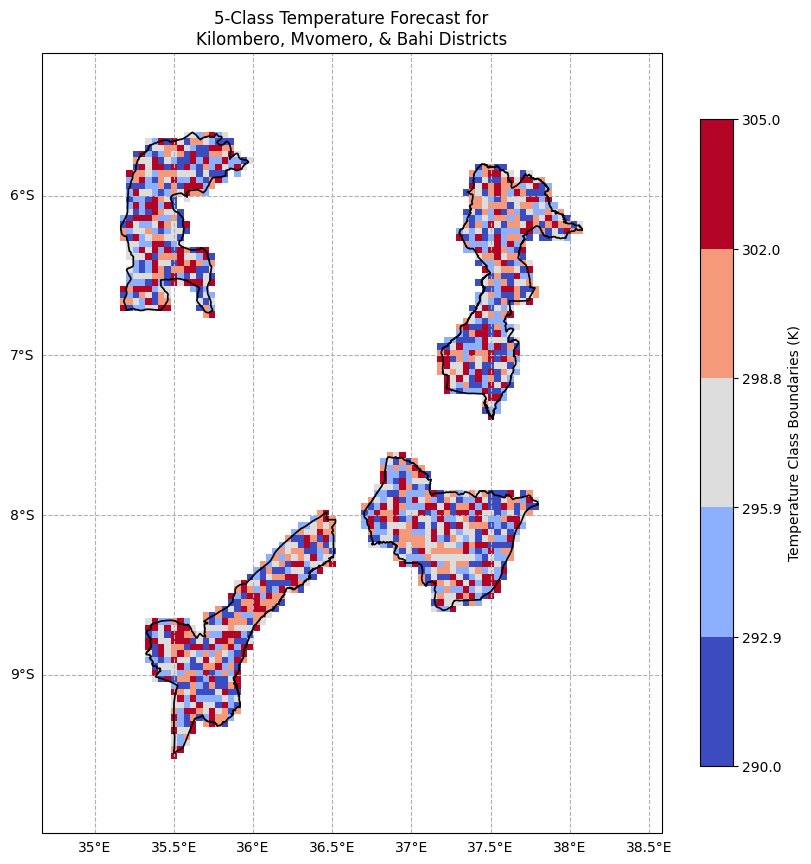

In [34]:
import os
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
# NEW: Import BoundaryNorm for creating discrete color bins
from matplotlib.colors import BoundaryNorm

# --- Step 1: Install necessary libraries ---
print("--- Step 1: Installing geopandas and rioxarray ---")
!pip install -q geopandas rioxarray

import geopandas
import rioxarray


# --- Step 2: Mount Google Drive ---
print("\n--- Step 2: Mounting Google Drive ---")
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


# --- Step 3: Load Shapefile and Filter for Specific Districts ---
print("\n--- Step 3: Loading and filtering Districts shapefile ---")
shapefile_path = "/content/drive/MyDrive/Shapefiles/Districts and TC as 2020.shp"
district_col_name = 'NewDist20' # Assumed column name
target_districts = ['Kilombero DC', 'Mvomero DC', 'Bahi DC']

try:
    all_districts_gdf = geopandas.read_file(shapefile_path)
    all_districts_gdf = all_districts_gdf.to_crs("EPSG:4326")
    selected_districts_gdf = all_districts_gdf[all_districts_gdf[district_col_name].isin(target_districts)]
    if selected_districts_gdf.empty:
        raise ValueError("No districts found. Check names and column name.")
    print(f"Successfully selected {len(selected_districts_gdf)} districts for plotting.")
except Exception as e:
    print(f"ERROR: Could not load or process the shapefile.")
    raise e


# --- Step 4: Prepare Data and Clip Data Array ---
print("\n--- Step 4: Preparing and clipping data ---")
# Using dummy data. In your real case, this would be your forecast data.
data = { "lon": np.linspace(25, 45, 500), "lat": np.linspace(-15, 5, 500),}
temp_data = 290 + 15 * np.random.rand(len(data["lat"]), len(data["lon"]))

temp_da = xr.DataArray(
    data=temp_data, dims=["lat", "lon"],
    coords=dict(lon=(["lon"], data["lon"]), lat=(["lat"], data["lat"]))
)
temp_da.rio.write_crs("EPSG:4326", inplace=True)
temp_da.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)

# Clip the data array itself. This gives us a data object to analyze.
temp_clipped = temp_da.rio.clip(selected_districts_gdf.geometry, all_touched=True)
print("Data array has been clipped to the selected districts.")


# --- Step 5: Classify the Clipped Data into 5 Bins ---
print("\n--- Step 5: Classifying data into 5 temperature classes ---")
# Get the actual data values, ignoring the 'no data' (NaN) values
clipped_values = temp_clipped.values
clipped_values = clipped_values[~np.isnan(clipped_values)]

# Define the number of classes
num_classes = 5

# Calculate the class boundaries using quantiles. This ensures each class has a similar area.
# We get 6 boundaries for 5 classes.
bins = np.quantile(clipped_values, q=np.linspace(0, 1, num_classes + 1))
print(f"Temperature will be classified into these bins (in Kelvin):\n{bins}")

# Select a colormap and create a discrete version with 5 colors
cmap = plt.get_cmap('coolwarm', num_classes)

# Create a 'BoundaryNorm' which maps the data values to our discrete color bins
norm = BoundaryNorm(bins, ncolors=cmap.N, clip=True)


# --- Step 6: Create the Final Classified Plot ---
print("\n--- Step 6: Generating final classified map ---")
plt.close("all")
projection = ccrs.PlateCarree()
fig, ax = plt.subplots(subplot_kw={"projection": projection}, figsize=(10, 12))

# Use pcolormesh, which works well with BoundaryNorm for discrete classes
# Pass the custom colormap (cmap) and the normalization (norm)
im = temp_clipped.plot.pcolormesh(
    ax=ax,
    x="lon", y="lat",
    transform=ccrs.PlateCarree(),
    cmap=cmap,
    norm=norm, # Apply the discrete color normalization
    add_colorbar=False
)

# Draw the district boundaries on top
selected_districts_gdf.boundary.plot(ax=ax, color='black', linewidth=1.2, zorder=5)

# Add a customized color bar that shows the class ranges
cbar = plt.colorbar(im, ax=ax, orientation="vertical", pad=0.05, shrink=0.7, ticks=bins)
cbar.set_ticklabels([f'{val:.1f}' for val in bins]) # Format labels
cbar.set_label("Temperature Class Boundaries (K)")

# Finalize the plot
ax.set_title("5-Class Temperature Forecast for\nKilombero, Mvomero, & Bahi Districts")
minx, miny, maxx, maxy = selected_districts_gdf.total_bounds
ax.set_extent([minx - 0.5, maxx + 0.5, miny - 0.5, maxy + 0.5], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, linestyle='--'); gl.top_labels=False; gl.right_labels=False;

output_path = "outputs/selected_districts_t2m_classified.jpg"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"Plot saved successfully to {output_path}")
plt.show()

# Earth2Studio GFS Data Download, Inference, and Visualization Example

This script demonstrates how to use the Earth2Studio library to:

1. **Install necessary dependencies:** Installs `earth2studio`, `cartopy`, `geopandas`, and `rioxarray`.
2. **Load and manage models:** Downloads and loads the FCN model package, optionally caching it on Google Drive.
3. **Download GFS Data:** Utilizes the GFS data source to fetch meteorological data for a specified time range.
4. **Run Deterministic Inference:** Executes a deterministic forecast using the loaded FCN model and the downloaded GFS data.
5. **Store and Verify Results:** Saves the inference output to a Zarr backend, optionally on Google Drive, and verifies the saved data structure.
6. **Visualize Forecast Data:**
    - Generates a global plot of a chosen variable (e.g., 2m temperature) at a specific lead time using `cartopy`.
    - Creates a zoomed-in plot for a specific region (Tanzania) using `cartopy` and `geopandas` for boundary information.
    - Demonstrates different plotting styles, including pcolormesh and contourf for smoother visualization.
    - Shows how to clip data to geographical boundaries using `rioxarray` and a shapefile.
    - Classifies temperature data into discrete bins and visualizes the classes within selected districts using a shapefile and `matplotlib.colors.BoundaryNorm`.

## Requirements

- Google Colab environment (or a similar environment with access to necessary libraries and potentially Google Drive)
- A Google account with Google Drive access (if using the Google Drive caching and output features)
- A shapefile for geographical boundaries (if running the clipping and localized plotting sections). The example uses a shapefile located at `/content/drive/MyDrive/Shapefiles/Districts and TC as 2020.shp` on Google Drive.

## How to Use

1. Open the notebook in Google Colab.
2. Run the code cells sequentially.
3. If using Google Drive features, authorize access when prompted.
4. Update the `shapefile_path` variable in the relevant cells to point to your desired shapefile location on Google Drive.
5. Modify the `target_districts` list in the classified plotting cell to select specific districts for visualization.
6. Explore the generated plots saved in the `outputs` directory.

This script provides a comprehensive example of a typical workflow with Earth2Studio for weather data processing, model inference, and geographical visualization.